
# Project: No-show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project, we will be analysing information from a dataset containing 100k medical appointments in Brazil. We will be looking at the factors that determine whether the patients show up for their appointments or not. We will be exploring how factors like Diabetes, Hypertension, Handicap, Alcoholism, SMS notification and Scholarship affect how patients show up for their appointments.  


### Questions for Analysis
> Is Gender a significant factor to determine the appointment attendance?

> Is Age a significant factor to determine the appointment attendance? 

> Is Hypertension a significant factor to determine the appointment attendance?

> Is Diabetes a significant factor to determine the appointment attendance?

> Is Handicap a significant factor to determine the appointment attendance?

> Is Alcoholism a significant factor to determine the appointment attendance?

> Is receiving SMS text a significant factor to determine the appointment attendance?

In [1]:
# Upgrade pandas to use dataframe.explode() function.
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.5MB/s ta 0:00:011   26% |████████▍                       | 2.7MB 11.9MB/s eta 0:00:01    32% |██████████▍                     | 3.4MB 29.4MB/s eta 0:00:01    44% |██████████████▍                 | 4.7MB 13.0MB/s eta 0:00:01    51% |████████████████▍               | 5.3MB 12.6MB/s eta 0:00:01    63% |████████████████████▎           | 6.6MB 27.2MB/s eta 0:00:01    69% |██████████████████████          | 7.2MB 28.5MB/s eta 0:00:01    75% |████████████████████████▎       | 7.9MB 13.9MB/s eta 0:00:01    81% |██████████████████████████▏     | 8.6MB 14.7MB/s eta 0:00:01    87% |████████████████████████████    | 9.2MB 25.3MB/s eta 0:00:01    93% |██████████████████████████████  | 9.8MB 27.8MB/s eta 0:00:01    99% |███████████████████████████████▉| 10.4MB 10.2MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.7MB/s eta 0:00:01   10% |███▍                            | 1.4MB 25.9MB/s eta 0:00:01    20% |██████▋                

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [3]:
#read the data and print the first five rows
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#print the number of columns and row in the data
df.shape

(110527, 14)

In [5]:
#print the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#print the columns in the data
list(df)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

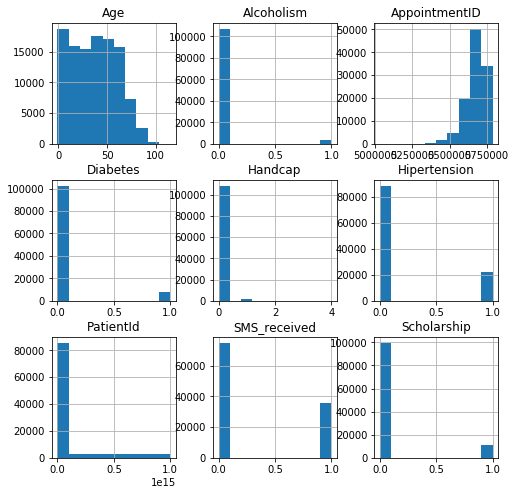

In [7]:
#show the distribution of the data
df.hist(figsize = (8,8));

In [8]:
#print the data summary
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
#print the sum of the duplicate rows in the data
sum(df.duplicated())

0

We have no duplicate rows in the data


### Data Cleaning
> In this section, we will be replacing the negative value of age with the mean of ages. Also, we will rename mispelled columns and do other assigning functions

In [10]:
#print the mean of the ages
df.Age.mean()

37.08887421173107

In [11]:
#replace the negative value of the age with the mean
df['Age'].replace({-1:37}, inplace=True)
df.Age.describe()

count    110527.000000
mean         37.089218
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

From the summary of the data, there was a negative value for the age. That value has now been replace with the mean of the ages

In [12]:
#rename misspelled columns with correctly spelled names and print the new names
df.rename(columns={'No-show':'No_show', 'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#Converting the values from integers to boolean
df['No_show'] = df['No_show'].apply(lambda x: True if x=='Yes' else False)
df['Hypertension'] = df['Hypertension'].apply(lambda x: True if x==1 else False)
df['Alcoholism'] = df['Alcoholism'].apply(lambda x: True if x==1 else False)
df['Scholarship'] = df['Scholarship'].apply(lambda x: True if x==1 else False)
df['Diabetes'] = df['Diabetes'].apply(lambda x: True if x==1 else False)
df['Handicap'] = df['Handicap'].apply(lambda x: True if x==1 else False)
df['SMS_received'] = df['SMS_received'].apply(lambda x: True if x==1 else False)

We converted the values in the columns (Hypertension, Alcholism, Scholarship, Diabetes, Handicap, SMS_received) from integers to boolean by assigning 0 for False and 1 for True

<a id='eda'></a>
## Exploratory Data Analysis


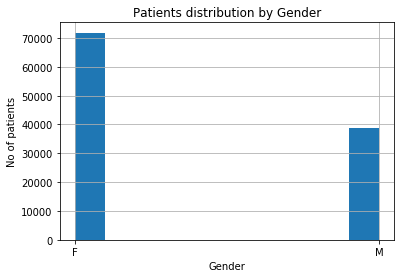

In [28]:
#show the distribution of the Gender
df.Gender.hist();
plt.title('Patients distribution by Gender');
plt.xlabel('Gender');
plt.ylabel('No of patients');

There are more female patients than male patients in the dataset

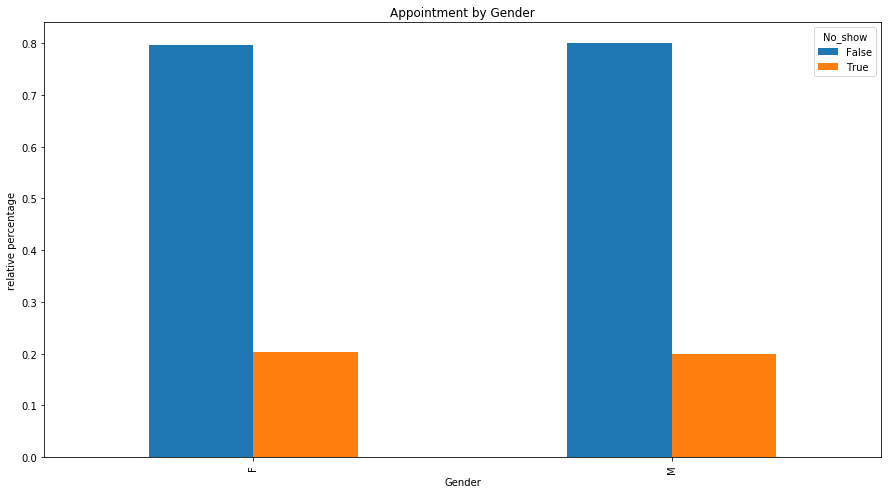

In [15]:
#appointment distribution by gender
gender = df.groupby('Gender')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,8))
gender.set_title('Appointment by Gender');
plt.xlabel('Gender');
plt.ylabel('relative percentage');

From the chart above, we can see that 80% of female patients showed up for their appointments while 20% did not. Also, 80% of male patients showed up for their appointments while 20% did not. It is evident that there is no relative difference in the appointment attendance by both genders since the same percentage of genders attended and did not. Hence, gender is not a significant factor to determine whether the female patients showed up for their appointments than the male patients.

In [16]:
#Categorise the age into age groups
Age_edges = [0,4,12,18,24,50,70,115]
Age_names = ['Baby','Child', 'Teen', 'Youth','Adult', 'Old', 'Elderly']
df['Age_group'] = pd.cut(df['Age'], Age_edges, labels=Age_names)
df['Age_group'].value_counts()

Adult      37837
Old        26850
Child      10794
Elderly     8573
Youth       8401
Teen        7830
Baby        6703
Name: Age_group, dtype: int64

Here, we grouped the ages into age groups (Baby, Child, Teen, Youth, Adult, Old and Elderly) to provide more clarity to the data

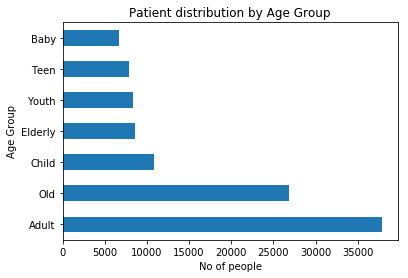

In [17]:
#Show the distribution of the age groups
df.Age_group.value_counts().plot(kind='barh');
plt.title('Patient distribution by Age Group');
plt.xlabel('No of people');
plt.ylabel('Age Group');

Using a horizontal bar chart, we can visualize the distribution of the age groups

In [18]:
#groupby the age group and No show
df.groupby('Age_group')['No_show'].value_counts()

Age_group  No_show
Baby       False       5477
           True        1226
Child      False       8352
           True        2442
Teen       False       5790
           True        2040
Youth      False       6282
           True        2119
Adult      False      29711
           True        8126
Old        False      22481
           True        4369
Elderly    False       7215
           True        1358
Name: No_show, dtype: int64

We can see the number of people that showed up and did not show for their appointments in each age group

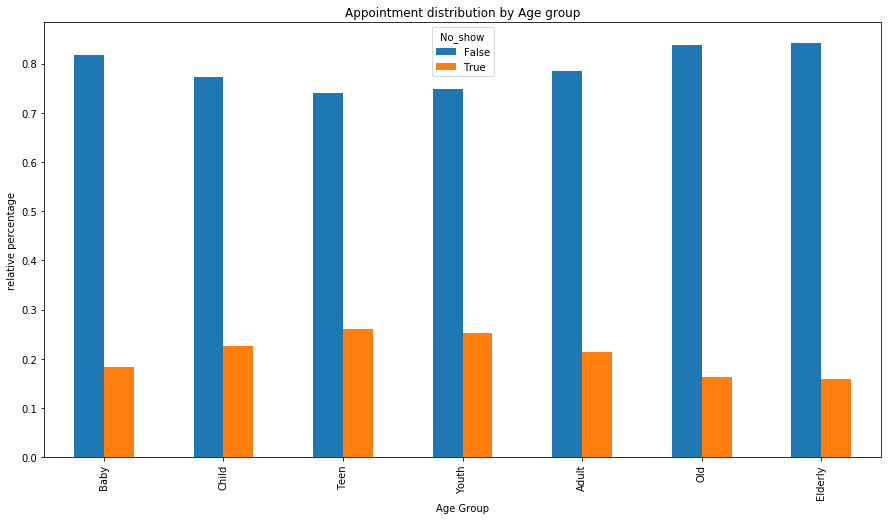

In [19]:
#appointment distribution by Age group
AgeGroup = df.groupby('Age_group')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,8))
plt.title('Appointment distribution by Age group');
plt.xlabel('Age Group');
plt.ylabel('relative percentage');

We can see that teenagers and youths are less likely to show up for their appointments than other age groups because they have the least percentage of patients that did not show up for their appointments. Age may be a significant factor in determining whether patients show up for their appointments or not since patients within a certain age group are less likely to show up for their appointments

In [24]:
#groupby hypertension and no show
df.groupby('Hypertension')['No_show'].value_counts(normalize=True)

Hypertension  No_show
False         False      0.790963
              True       0.209037
True          False      0.826980
              True       0.173020
Name: No_show, dtype: float64

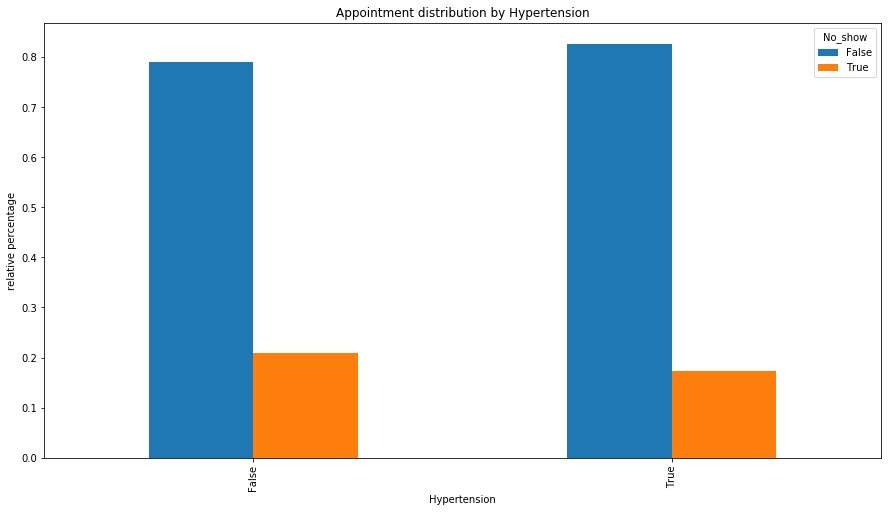

In [21]:
#appointment distribution by hypertension
Hyp_illness = df.groupby('Hypertension')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,8))
plt.title('Appointment distribution by Hypertension');
plt.xlabel('Hypertension');
plt.ylabel('relative percentage');

82.6% of hypertensive patients showed up for their appointments while 79% of non-hypertensive patients showed up for their appointments. This is a significant statistic and it can be deduced as seen in the chart above that Hypertensive patients are more likely to show up for their appointments than patients who are not hypertensive.

In [23]:
#groupby diabetes and no show
df.groupby('Diabetes')['No_show'].value_counts(normalize=True)

Diabetes  No_show
False     False      0.796372
          True       0.203628
True      False      0.819967
          True       0.180033
Name: No_show, dtype: float64

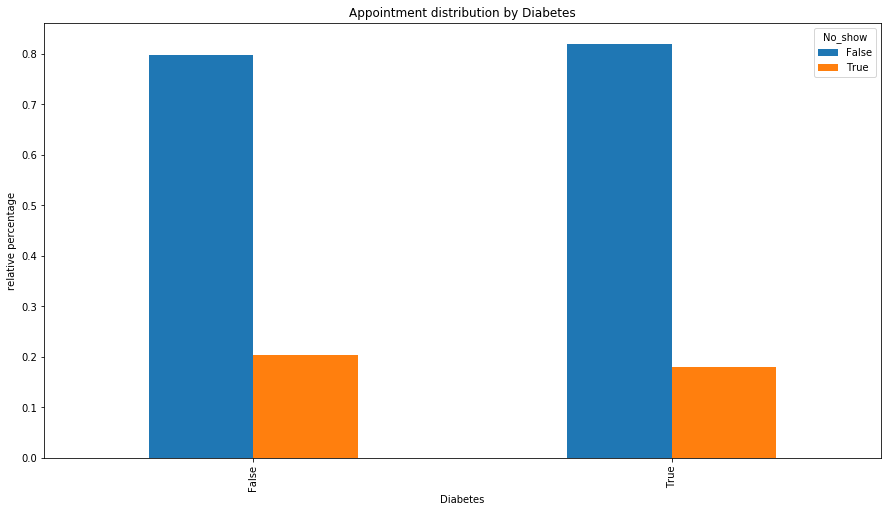

In [21]:
#appointment distribution by diabetes
Dia_illness = df.groupby('Diabetes')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,8))
plt.title('Appointment distribution by Diabetes');
plt.xlabel('Diabetes');
plt.ylabel('relative percentage');

About 79% of non-diabetic patients show up for their appointments while about 81% of diabetic patients show up for their appointments. This statistic may not prove to be important as the difference is not significant. Hence, diabetes may not be a significant factor in determining whether patients show up for their appointments or not.

In [25]:
#groupby handicap and no show
df.groupby('Handicap')['No_show'].value_counts(normalize=True)

Handicap  No_show
False     False      0.797640
          True       0.202360
True      False      0.820764
          True       0.179236
Name: No_show, dtype: float64

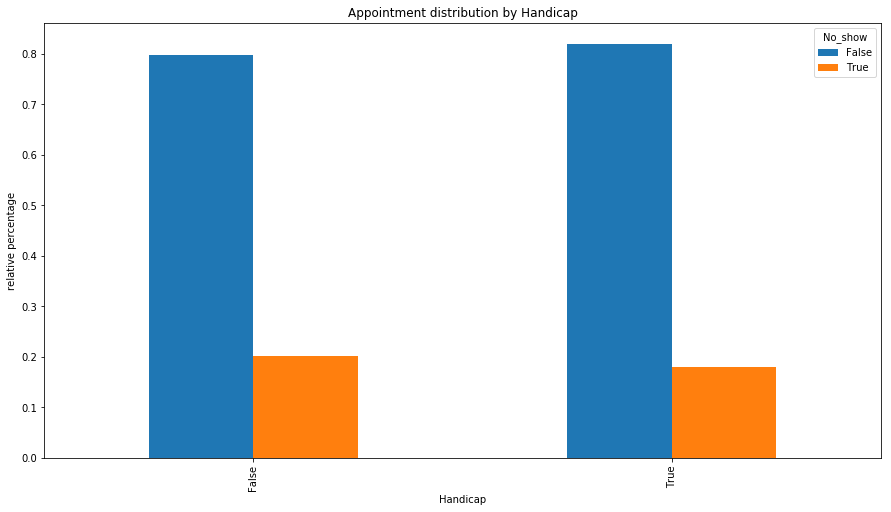

In [22]:
#appointment distribution by handicap
han_illness = df.groupby('Handicap')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,8))
plt.title('Appointment distribution by Handicap');
plt.xlabel('Handicap');
plt.ylabel('relative percentage');

82% of handicap showed up for their appointments while about 80% of non-handicap patients showed up for their appointments. Albeit more, the difference between the number of handicap patients and the non-handicap patients that show up for their appointment is not too significant. Hence, handicap may not be a significant factor to determine whether patients show up for their appointments or not.

In [26]:
#groupby alcoholism and no-show
df.groupby('Alcoholism')['No_show'].value_counts(normalize=True)

Alcoholism  No_show
False       False      0.798054
            True       0.201946
True        False      0.798512
            True       0.201488
Name: No_show, dtype: float64

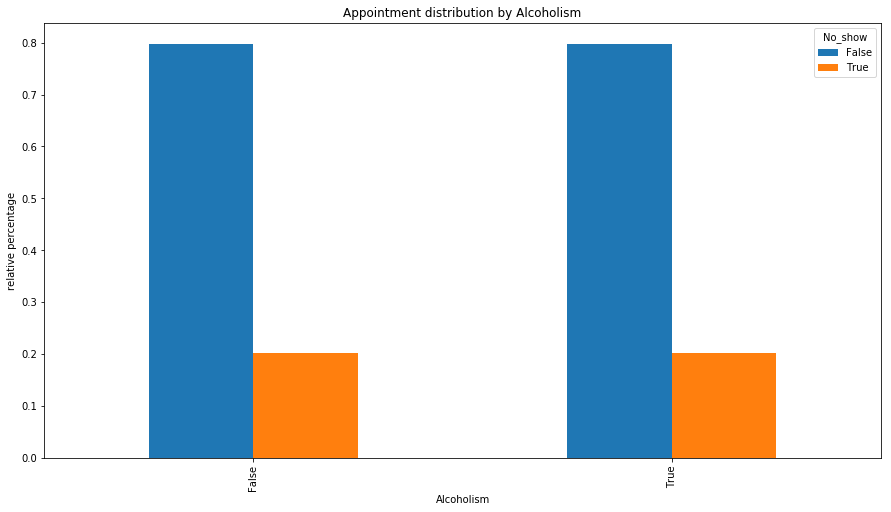

In [23]:
#appointment distribution by alcoholism
alcohol = df.groupby('Alcoholism')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,8))
plt.title('Appointment distribution by Alcoholism');
plt.xlabel('Alcoholism');
plt.ylabel('relative percentage');

Both alcoholic and non-alcoholic patients had 79% of patients that showed up for their appointments. There is no difference in the percentage between the alcholic patients and non-alcoholic patient that show up for their appointments. Alcoholism is not a signifacnt factor to determine whether patients will show up for their appointments or not. 

In [27]:
#groupby sms received and no-show
df.groupby('SMS_received')['No_show'].value_counts(normalize=True)

SMS_received  No_show
False         False      0.832967
              True       0.167033
True          False      0.724255
              True       0.275745
Name: No_show, dtype: float64

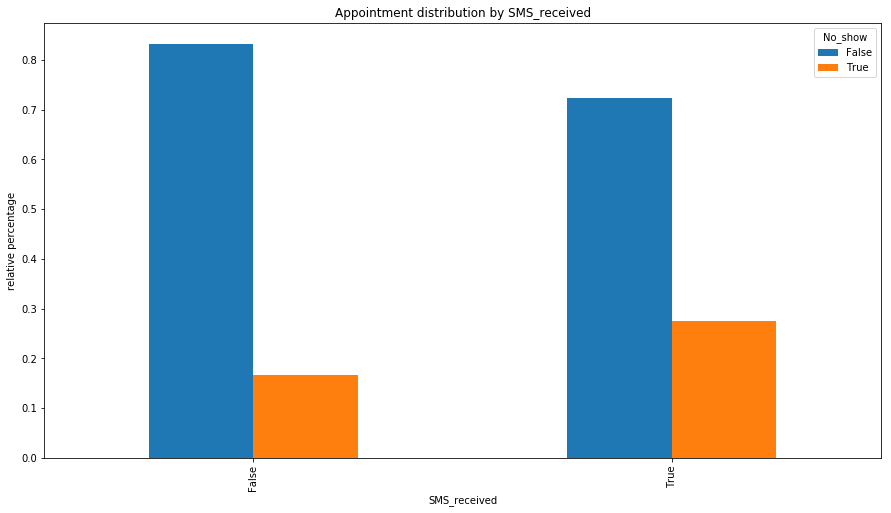

In [24]:
#appoinmtment distribution by sms received
sms = df.groupby('SMS_received')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,8))
plt.title('Appointment distribution by SMS_received');
plt.xlabel('SMS_received');
plt.ylabel('relative percentage');

72% of patients that received sms showed up for their appointments while 83% of people that did not receive sms showed up for their appointments. The disparity can be seen in the chart above. Due to the high difference in statistic, sms received may be a significant factor in determining whether patients show up for their appointments or not.

## Conclusions

### Results

From the analysis, we can deduce the following statements;

> Gender is not a significant factor to determine whether patients will show up for their appointments or not.

> Age may be a significant factor to determine whether patients will show up for their appointments or not.

> Hypertension may be a significant factor to determine whether patients will show up for their appointments or not.

> Diabetes may not be a significant factor to determine whether patients will show up for their appointments or not.

> Handicap may not be a significant factor to determine whether patients will show up for their appointments or not.

> Alcoholism is not a significant factor to determine whether patients will show up for their appointments or not.

> Receiving SMS may be a significant factor to determine whether patients will show up for their appointments or not.

### Limitations

> There was a negative value for the age in the data which had to replaced with the mean of the ages

> The values of the factors were collated in the integers and had to be changed to boolean values to provide more clarity with the analysis